<h1 style="font-size:36px;">Support Vector Regression</h1>


We will use Support Vector Regression, a type of Support Vector Machine that supports linear and non-linear regression, to predict the future price of Bitcoin based on past price data. SVMs are commonly used for classification and regression analysis by finding the best line or hyperplane that separates data into different categories or regions. By applying this model to BTC price prediction, we can analyze data and identify patterns to approximate the function generated by the training set.

Geçmiş fiyat verilerine dayanarak Bitcoin'in gelecekteki fiyatını tahmin etmek için doğrusal ve doğrusal olmayan regresyonu destekleyen bir Destek Vektör Makinesi türü olan Destek Vektörü Regresyonunu kullanacağız. SVM'ler, verileri farklı kategorilere veya bölgelere ayıran en iyi çizgiyi veya hiper düzlemi bularak sınıflandırma ve regresyon analizi için yaygın olarak kullanılır. Bu modeli BTC fiyat tahminine uygulayarak, eğitim seti tarafından oluşturulan fonksiyona yaklaşmak için verileri analiz edebilir ve kalıpları belirleyebiliriz.

In [21]:
print(SVR_ERROR)

        linear          poly           rbf
MSE   0.003897  6.994844e+07  1.632100e+07
RMSE  0.062427  8.363519e+03  4.039926e+03
MAE   0.047937  7.315969e+03  3.477854e+03
R2    1.000000  6.277745e-01  9.131490e-01



<h3 style="font-size:24px;">Data preprocessing and Preparation</h3>

In [2]:
import quandl
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import csv
from csv import reader
from csv import writer

In [3]:
#importing the btc data
df=pd.read_csv('btcusd.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3145,2023-04-28,29481.013672,29572.791016,28929.609375,29340.261719,29340.261719,17544464887
3146,2023-04-29,29336.566406,29452.455078,29088.042969,29248.488281,29248.488281,10662634333
3147,2023-04-30,29245.515625,29952.029297,29114.021484,29268.806641,29268.806641,14652199272
3148,2023-05-01,29227.103516,29329.935547,27680.792969,28091.568359,28091.568359,18655599976


In [4]:
from datetime import datetime



date_string = "2014-09-17"
date_object = datetime.strptime(date_string, "%Y-%m-%d")



In [5]:
import pandas as pd

df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')

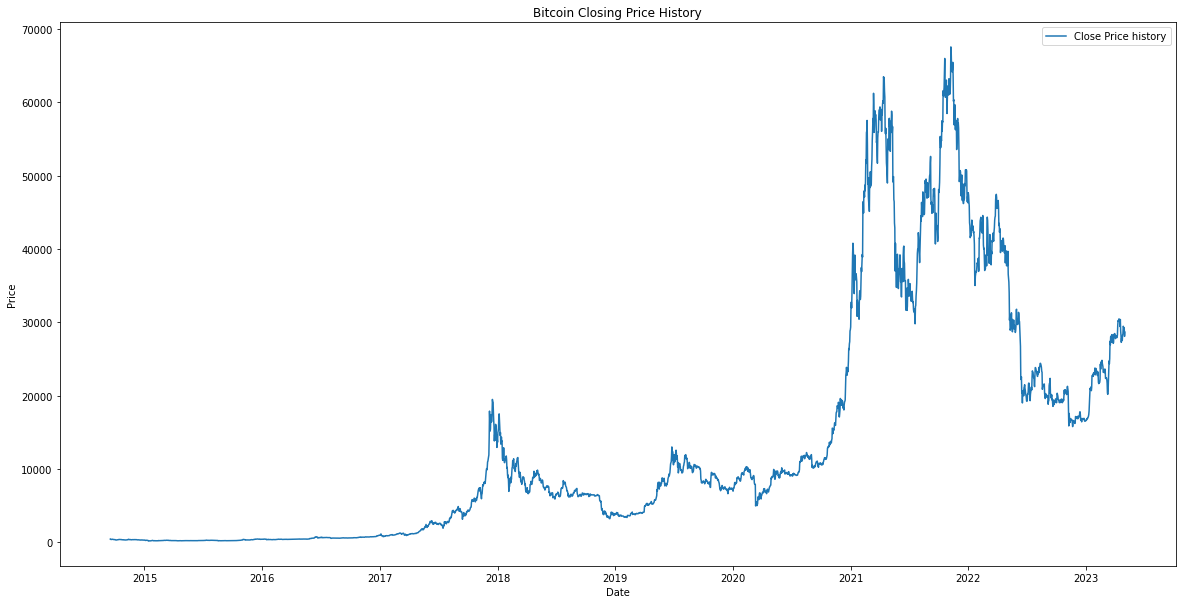

In [6]:
#plot

plt.figure(figsize=(20,10))
plt.plot(df['Date'],df['Close'], label='Close Price history')
plt.title('Bitcoin Closing Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [7]:

X=df["Close"]
y=df['Adj Close']
y=np.asarray(y)

In [8]:

X_train=X[:int(0.8*len(X))]
X_train_date=df['Date'][:int(0.8*len(X))]
X_test=X[int(0.8*len(X)):]
X_test_date=df['Date'][int(0.8*len(X)):]
y_train=y[:int(0.8*len(y))]
y_test=y[int(0.8*len(y)):]
     

In [9]:
minn=np.min(X_train)
maxx=np.max(X_train)
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
X_test=(X_test-minn)/(maxx-minn)

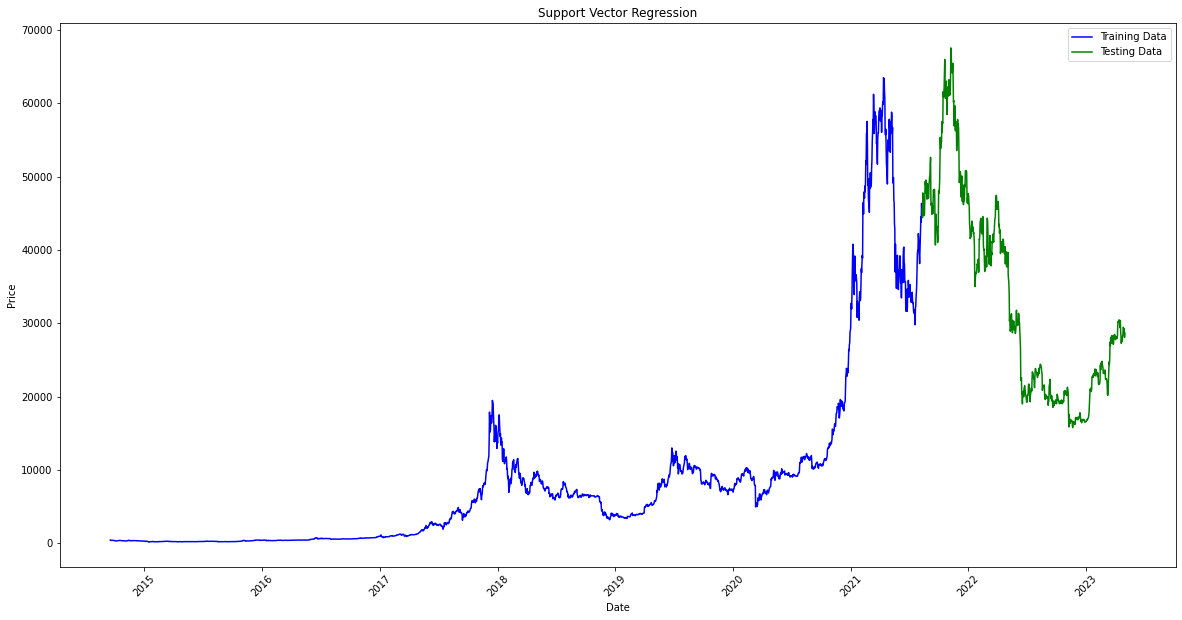

In [10]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)


plt.plot(X_train_date, y_train, 'blue', label='Training Data')
plt.plot(X_test_date, y_test, 'green', label='Testing Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend(loc='upper right')
plt.show()




We will test 3 different kernels of the SVR function to find the best fit for our data, as each kernel is designed to handle different types of data characteristics.

En iyi uygunluğu sağlayan kerneli belirlemek için SVR fonksiyonunun 3 farklı kernelini deneyeceğiz.

In [11]:
import numpy as np

y_train = np.array(y_train)
y_test = np.array(y_test)

X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [12]:

svr_lin  = SVR(kernel='linear', C=1e3,gamma=0.1)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

y_train = y_train.ravel()
y_test = y_test.ravel()



svr_lin.fit(X_train, y_train)
svr_poly.fit(X_train,y_train)
svr_rbf.fit(X_train,y_train)

SVR(C=1000.0, gamma=0.1)


<h3 style="font-size:24px;">SVR Linear Kernel</h3>

It tries to linearly separate the data. This method is preferred when the data moves in line with a certain trend. The linear kernel flattens the data so that it is understood that the data is moving in line with a trend.

Verileri doğrusal olarak ayırmaya çalışır. Bu yöntem verilerin belirli bir eğilim doğrultusunda hareket ettiği durumlarda tercih edilir. Lineer kernel verileri düzleştirir ve bu sayede verilerin bir eğilim doğrultusunda hareket ettiği anlaşılır.

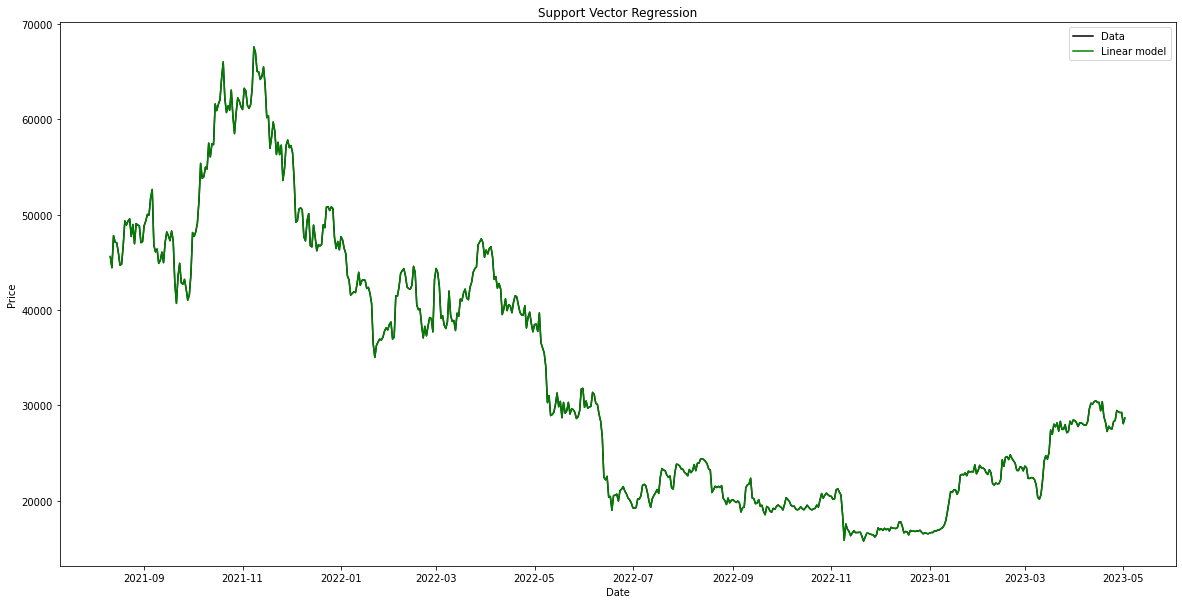

In [13]:
plt.figure(figsize=(20,10))

plt.plot(X_test_date, y_test, c='k', label='Data')
y_lin=svr_lin.predict(X_test)
plt.plot(X_test_date, y_lin, c='g', label='Linear model')
   
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()
     

<h3 style="font-size:24px;">SVR RBF Kernel</h3>

The RBF (Radial Basis Function) kernel is the most commonly used kernel in Support Vector Regression. It is a Gaussian function that uses distance as a similarity measure. This kernel is suitable for solving non-linear problems and can handle complex data patterns.

RBF (Radial Basis Function) çekirdeği, Destek Vektörü Regresyonunda en sık kullanılan çekirdektir. Benzerlik ölçüsü olarak uzaklığı kullanan bir Gauss fonksiyonudur. Bu çekirdek, doğrusal olmayan sorunları çözmek için uygundur ve karmaşık veri modellerini işleyebilir.

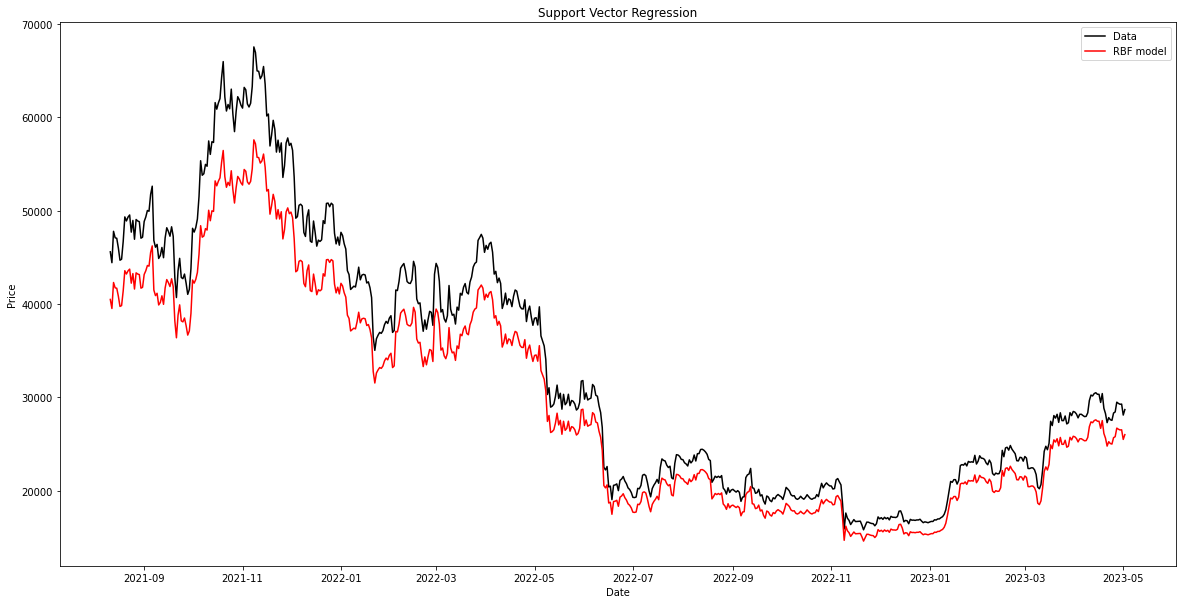

In [14]:
plt.figure(figsize=(20,10))
plt.plot(X_test_date, y_test, c='k', label='Data')
y_rbf=svr_rbf.predict(X_test)
plt.plot(X_test_date, y_rbf, c='r', label='RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

<h3 style="font-size:24px;">SVR Poly Kernel</h3>

This kernel type transforms the data using the degree of polynomial. The degree of polynomial is a hyperparameter of this kernel type and also carries the risk of overfitting. Therefore, the degree of polynomial should be chosen well.

Bu kernel tipi polinom derecesini kullanarak verileri dönüştürür. Polinom derecesi bu kernel tipinde bir hiperparametredir ve aynı zamanda aşırı uydurma (overfitting) riski de taşır. Bu nedenle, polinom derecesi iyi seçilmelidir.

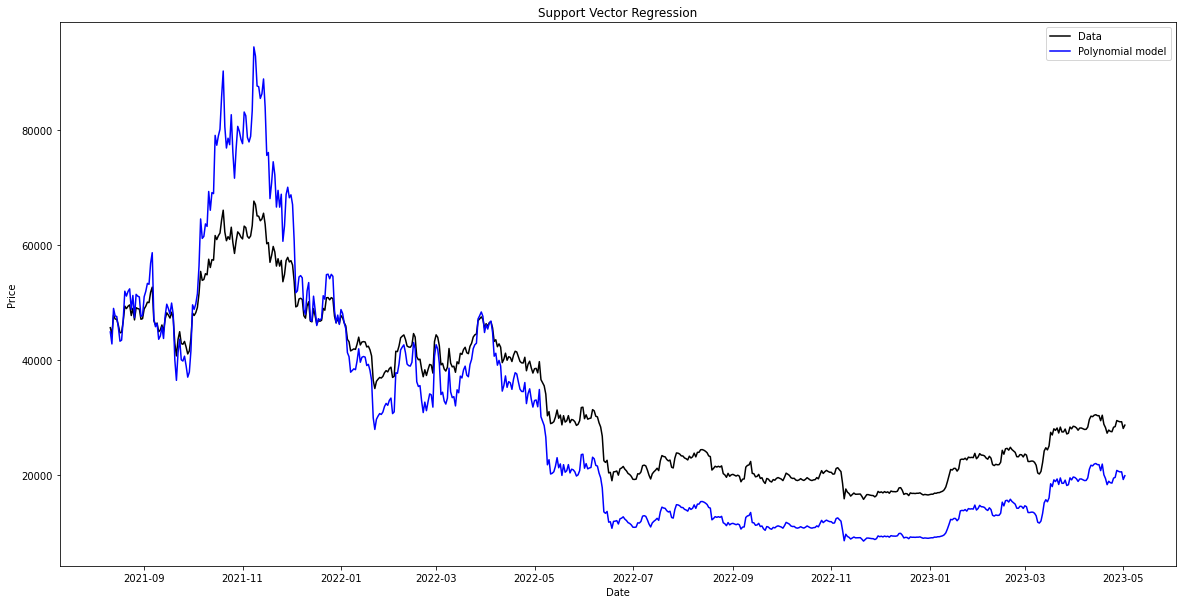

In [15]:
plt.figure(figsize=(20,10))
plt.plot(X_test_date, y_test, c='k', label='Data')
y_poly=svr_poly.predict(X_test)
plt.plot(X_test_date, y_poly, c='b', label='Polynomial model')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

<h3 style="font-size:24px;">Comparative analysis</h3>

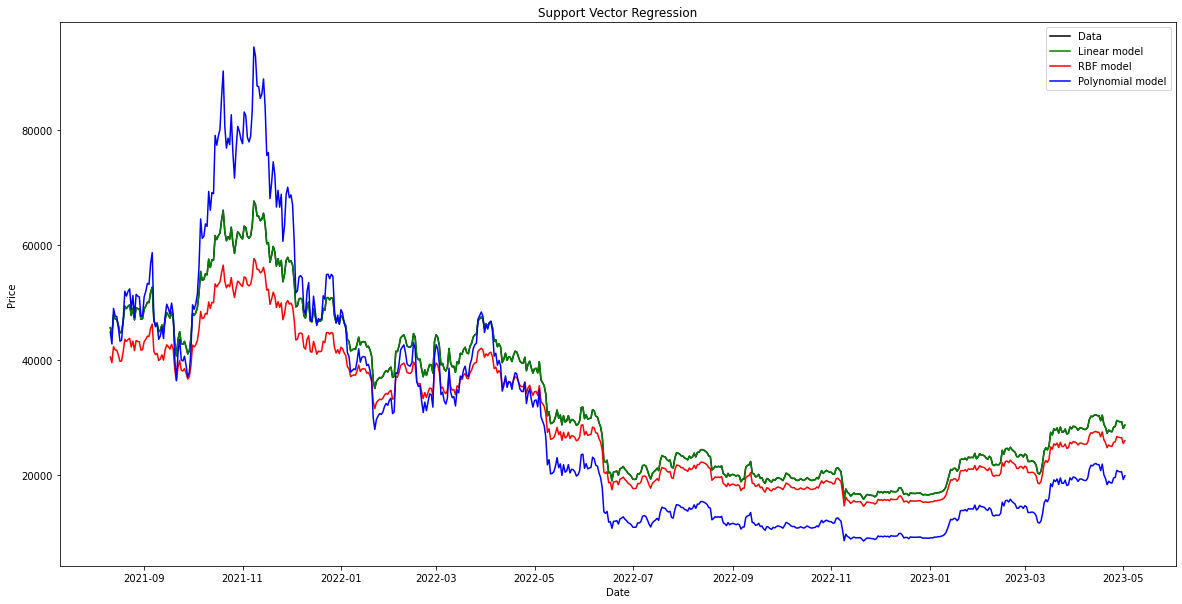

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(X_test_date, y_test, c='k', label='Data')
plt.plot(X_test_date, svr_lin.predict(X_test), c='g', label='Linear model')
plt.plot(X_test_date, svr_rbf.predict(X_test), c='r', label='RBF model') 
plt.plot(X_test_date, svr_poly.predict(X_test), c='b', label='Polynomial model')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

<h3 style="font-size:18px;">RMSE error and confidence SVR Linear</h3>

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# The best possible score is 1.0
svr_confidence = svr_rbf.score(X_test, y_test)
lin_mse = mean_squared_error(y_lin, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(y_lin, y_test)
lin_r2 = r2_score(y_lin, y_test)

<h3 style="font-size:18px;">RMSE error and confidence SVR RBF</h3>


In [18]:

svr_confidence = svr_lin.score(X_test, y_test)
rbf_mse = mean_squared_error(y_rbf, y_test)
rbf_rmse = np.sqrt(lin_mse)
rbf_mae = mean_absolute_error(y_rbf, y_test)
rbf_r2 = r2_score(y_rbf, y_test)

     

<h3 style="font-size:18px;">RMSE error and confidence SVR Poly</h3>

In [19]:

svr_confidence = svr_poly.score(X_test, y_test)
poly_mse = mean_squared_error(y_poly, y_test)
poly_rmse = np.sqrt(poly_mse)
poly_mae = mean_absolute_error(y_poly, y_test)
poly_r2 = r2_score(y_poly, y_test)



In [20]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# SVR modellerinin listesi
models = [('linear', svr_lin), ('poly', svr_poly), ('rbf', svr_rbf)]

# Hata değerlerini hesaplamak için bir sözlük oluşturun
errors = {}
for name, model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    errors[name] = [mse, rmse, mae, r2]

# Hata değerlerini içeren DataFrame'i oluşturun
SVR_ERROR = pd.DataFrame(errors, index=['MSE', 'RMSE', 'MAE', 'R2'])

# DataFrame'i yazdırın
print(SVR_ERROR)



        linear          poly           rbf
MSE   0.003897  6.994844e+07  1.632100e+07
RMSE  0.062427  8.363519e+03  4.039926e+03
MAE   0.047937  7.315969e+03  3.477854e+03
R2    1.000000  6.277745e-01  9.131490e-01
